In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
data = pd.read_csv(r'Main_data.csv')
data.head()

,Age,Sex,Resting_BP,Cholestrol_mg/dl,Fasting_sugar,Max_HR_achieved,Exercise_induced_angina,ST_depression,Chest_pain_type_1,Chest_pain_type_2,Chest_pain_type_3,Chest_pain_type_4,Resting_ECG_0,Resting_ECG_1,Resting_ECG_2,Diagnosis
0,63,1,145,233,1,150,0,2.3,1,0,0,0,0,0,1,0
1,67,1,160,286,0,108,1,1.5,0,0,0,1,0,0,1,1
2,67,1,120,229,0,129,1,2.6,0,0,0,1,0,0,1,1
3,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,0,0
4,41,0,130,204,0,172,0,1.4,0,1,0,0,0,0,1,0


In [5]:
data["Diagnosis"].value_counts()/(327+237)

0    0.579787
1    0.420213
Name: Diagnosis, dtype: float64

In [7]:
from sklearn.utils import shuffle
data = shuffle(data)

In [8]:
data.isnull().sum()

Age                        0
Sex                        0
Resting_BP                 0
Cholestrol_mg/dl           0
Fasting_sugar              0
Max_HR_achieved            0
Exercise_induced_angina    0
ST_depression              0
Chest_pain_type_1          0
Chest_pain_type_2          0
Chest_pain_type_3          0
Chest_pain_type_4          0
Resting_ECG_0              0
Resting_ECG_1              0
Resting_ECG_2              0
Diagnosis                  0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, 0:15].values
y = data.iloc[:,15].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_t, X_val, y_train_t, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)
sc = StandardScaler()
sc.fit(X_train_t)
X_train_t_std = sc.transform(X_train_t)
X_val_std = sc.transform(X_val)
X_test_std = sc.transform(X_test)

In [10]:
param_grid = [
  {'C': np.array([0.001,0.003,0.01,0.03,0.1,0.3,1,3]), 'kernel': ['linear','rbf','sigmoid'],
  'gamma': np.array([0.001,0.003,0.01,0.03,0.1,0.3,1,3])}
 ]
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
svm_clf = SVC()
grid = GridSearchCV(svm_clf, param_grid, cv=10, scoring='accuracy')

E:\SHIVAM MAHAJAN\Anaconda\envs\snakes\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\SHIVAM MAHAJAN\Anaconda\envs\snakes\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [11]:
grid.fit(X_train_t_std, y_train_t)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': array([  1.00000e-03,   3.00000e-03,   1.00000e-02,   3.00000e-02,
         1.00000e-01,   3.00000e-01,   1.00000e+00,   3.00000e+00]), 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': array([  1.00000e-03,   3.00000e-03,   1.00000e-02,   3.00000e-02,
         1.00000e-01,   3.00000e-01,   1.00000e+00,   3.00000e+00])}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [12]:
grid.grid_scores_

[mean: 0.68047, std: 0.05675, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'},
 mean: 0.57396, std: 0.00212, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.57396, std: 0.00212, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'sigmoid'},
 mean: 0.68047, std: 0.05675, params: {'C': 0.001, 'gamma': 0.0030000000000000001, 'kernel': 'linear'},
 mean: 0.57396, std: 0.00212, params: {'C': 0.001, 'gamma': 0.0030000000000000001, 'kernel': 'rbf'},
 mean: 0.57396, std: 0.00212, params: {'C': 0.001, 'gamma': 0.0030000000000000001, 'kernel': 'sigmoid'},
 mean: 0.68047, std: 0.05675, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'},
 mean: 0.57396, std: 0.00212, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: 0.57396, std: 0.00212, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid'},
 mean: 0.68047, std: 0.05675, params: {'C': 0.001, 'gamma': 0.029999999999999999, 'kernel': 'linear'},
 mean: 0.57396, std: 0.00212, params: {'C': 0.001, 'gamma': 0.0299

In [13]:
grid.best_params_

{'C': 0.029999999999999999, 'gamma': 1.0, 'kernel': 'sigmoid'}

In [26]:
from sklearn.metrics import accuracy_score
svm_clf = SVC(C=3, kernel ='rbf', gamma = 0.003, probability=True)
svm_clf.fit(X_train_t_std, y_train_t)
y_pred_val = svm_clf.predict(X_val_std)
accuracy_score(y_pred_val, y_val)

0.84070796460176989

In [35]:
y_pred_test = svm_clf.predict(X_test_std)
y_test_prob = np.array(svm_clf.predict_proba(X_test_std)[:,1])
accuracy_score(y_pred_test, y_test)

0.78761061946902655

In [47]:
y_pred = np.array(y_test_prob>0.4,dtype=np.int)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [46]:
accuracy_score(y_pred, y_test)

0.65486725663716816

In [44]:
np.sum(y_test)/len(y_test)

0.35398230088495575

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
tpr, fpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(tpr,fpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

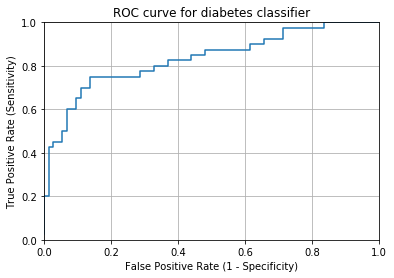

In [53]:
plt.show()

In [55]:
roc_auc_score(y_test,y_test_prob)

0.83356164383561637

In [69]:
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix, recall_score
def evaluate_score(threshold):
    ypred_class = binarize([y_test_prob],threshold)
    ypred_class = ypred_class[0]
    confusion = confusion_matrix(y_test,ypred_class)
    tpr = recall_score(y_test,ypred_class)
    fpr = confusion[0,1]/float(confusion[0,1] + confusion[0,0])
    print("Senstivty:", tpr)
    print("Specificity :", 1-fpr)

In [78]:
evaluate_score(0.55)

Senstivty: 0.75
Specificity : 0.86301369863
